Name: Aman Agarwal<br/>
Student ID: 1161131<br/>
Submission Details:<br/>
Course: Numerical Hydrodynamics (PHYS 7900)<br/>
Instructor: Dr. Daniel Siegel<br/>
Github link for the submission:https://github.com/aman2010ag/Computational_Fluid_Dynamics_course_home_work/blob/main/CFD_Problem_Set5.ipynb<br/>

First we will set up our exact Riemann Solver

 Following the algorithm discussed in the class, first we will find the primitive variables($v_*, p_*$) solutions around the contact discontinuity for Test 1. For that we need to apply the Newton Raphson scheme. 

In [2]:
#Declaring the global variables
global Gamma=1.4


1.4

In [3]:
#Function that takes in left and right state variable vectors and outputs primitive variables 
#sound speeds and other variables used in Riemann Solver 
function state_variables(w_l,w_r)
    rho_l=w_l[1]
    v_l=w_l[2]
    p_l=w_l[3]
    rho_r=w_r[1]
    v_r=w_r[2]
    p_r=w_r[3]
    c_l=(Gamma*p_l/rho_l)^(0.5)
    c_r=(Gamma*p_r/rho_r)^(0.5)
    A_l=2/((Gamma+1)*rho_l)
    B_l=((Gamma-1)*p_l)/(Gamma+1)
    A_r=2/((Gamma+1)*rho_r)
    B_r=((Gamma-1)*p_r)/(Gamma+1)
    return [rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r]
end

state_variables (generic function with 1 method)

In [4]:
#Functions for NR scheme
function f_left(p,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    if p> p_l
        return (p-p_l)*(A_l/(p+B_l))^(0.5)
    else
        return (2*c_l/(Gamma-1))*((p/p_l)^((Gamma-1)/(2*Gamma))-1)
    end
end
    
    
function f_right(p,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    if p> p_r
        return (p-p_r)*(A_r/(p+B_r))^(0.5)
    else
        return (2*c_r/(Gamma-1))*((p/p_r)^((Gamma-1)/(2*Gamma))-1)
    end
end
        
function f_left_prime(p,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    if p> p_l
        return (A_l/(p+B_l))^(0.5)-(p-p_l)*(0.5*((A_l^(0.5))/((p+B_l)^(1.5))))
    else
        return (2*c_l/(Gamma-1))*((Gamma-1)/(2*Gamma))*(((p/p_l)^((Gamma-2)/(2*Gamma))/p_l))
    end
end

function f_right_prime(p,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    if p> p_r
        return (A_r/(p+B_r))^(0.5)-(p-p_r)*(0.5*((A_r^(0.5))/((p+B_r)^(1.5))))
    else
        return (2*c_r/(Gamma-1))*((Gamma-1)/(2*Gamma))*(((p/p_r)^((Gamma-2)/(2*Gamma))/p_r))
    end
end

function f_total(p,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    return f_left(p,w_l,w_r)+f_right(p,w_l,w_r)+v_r-v_l
end

function f_prime_total(p,w_l,w_r)
    return f_left_prime(p,w_l,w_r) + f_right_prime(p,w_l,w_r)
end

f_prime_total (generic function with 1 method)

In [5]:
#Newton_Raphson_scheme
function NR_p_star(p_guess,w_l,w_r)
    p_next=p_guess+1
    Error=abs(p_next-p_guess)
    iterats=0
    while Error>=1*10^(-6) && iterats<10000
        p_next= p_guess-0.01*f_total(p_guess,w_l,w_r)/f_prime_total(p_guess,w_l,w_r)
        Error=abs(p_next-p_guess)
        p_guess=p_next
        iterats=iterats+1
    end
    if iterats==10000
        println("Maximum iterations reached before scheme converges")
    end
    return p_guess
end

NR_p_star (generic function with 1 method)

In [6]:
#function to find u_star
function v_star(p_star_output,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    return 0.5*(v_l+v_r)+0.5*(f_right(p_star_output,w_l,w_r)-f_left(p_star_output,w_l,w_r))
end

v_star (generic function with 1 method)

In [82]:
#calculating p_star and v_star
w_l=[1.0,0.75,1.0]
w_r=[0.125,0.0,0.1]
rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
p_star_guess= 0.5*(p_l+p_r)
println("The p_star guess for Test 1 is ",p_star_guess)
p_star_output=NR_p_star(p_star_guess,w_l,w_r)
v_star_output=v_star(p_star_output,w_l,w_r)
println("The calculated p_star for Test 1 is ",p_star_output)
println("The calculated v_star for Test 1 is ",v_star_output)

The p_star guess for Test 1 is 0.55
The calculated p_star for Test 1 is 0.4663757121890955
The calculated v_star for Test 1 is 1.360933492633018


We calculated the $(v_*, p_*)$ above. These variables do not vary across the contact discontinuity. $\rho$ variable varies across the contact discontinuity, hence we need to find $\rho_{*l}$ and $\rho_{*r}$ and define the solution. After the solution is defined, for a fixed time t, we will find the variable profiles by sampling the solution 

In [83]:
#Exact Riemann Solver borrowed from my PS5 solutions
#Two left case solutions of the Riemann problem
function left_shock(p_star_output,v_star_output,x,t,x_0,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    x=x-x_0 #we center our grid around the point of discontinuity
    shock_speed_l= v_l-c_l*(((Gamma+1)/(2*Gamma))*(p_star_output/p_l)+(Gamma-1)/(2*Gamma))^(0.5)
    if x/t>= shock_speed_l && x/t <= v_star_output
        rho_star_l= rho_l*((p_star_output/p_l)+((Gamma-1)/(Gamma+1)))/(((Gamma-1)/(Gamma*1))*(p_star_output/p_l)+1)
        return [rho_star_l,v_star_output,p_star_output]
    elseif x/t<= shock_speed_l
        return [rho_l,v_l,p_l]
    else
        return[0.0,0.0,0.0]
    end
end

function left_rarefaction_wave(p_star_output,v_star_output,x,t,x_0,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    x=x-x_0 #we center our grid around the point of discontinuity
    S_Hl= v_l-c_l
    S_Tl= v_star_output- c_l*(p_star_output/p_l)^((Gamma-1)/(2*Gamma))
    if x/t <= S_Hl
        return [rho_l,v_l,p_l]
    elseif x/t>= S_Hl && x/t <= S_Tl
        rho_fan= rho_l*((2/(Gamma+1))+((Gamma-1)/((Gamma+1)*c_l))*(v_l - x/t))^(2/(Gamma-1))
        v_fan= (2/(Gamma+1))*(c_l + (Gamma-1)*v_l/2 + x/t)
        p_fan= p_l*(2/(Gamma+1)+(Gamma-1)*(v_l-x/t)/((Gamma+1)*c_l))^(2*Gamma/(Gamma-1))
        return [rho_fan, v_fan, p_fan]
    elseif x/t<=v_star_output && x/t>=S_Tl
        rho_star_l= rho_l*(p_star_output/p_l)^(1/Gamma)
        return [rho_star_l, v_star_output, p_star_output]
    else
        return [0.0,0.0,0.0]
    end
end

#Two right case solutions of the Riemann problem
function right_shock(p_star_output,v_star_output,x,t,x_0,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    x=x-x_0 #we center our grid around the point of discontinuity
    shock_speed_r= v_r+c_r*(((Gamma+1)/(2*Gamma))*(p_star_output/p_r)+(Gamma-1)/(2*Gamma))^(0.5)
    if x/t<= shock_speed_r && x/t >= v_star_output
        rho_star_r= rho_r*((p_star_output/p_r)+((Gamma-1)/(Gamma+1)))/(((Gamma-1)/(Gamma*1))*(p_star_output/p_r)+1)
        return [rho_star_r,v_star_output,p_star_output]
    elseif x/t>= shock_speed_r
        return [rho_r,v_r,p_r]
    else
        return [0.0,0.0,0.0]
    end
end

function right_rarefaction_wave(p_star_output,v_star_output,x,t,x_0,w_l,w_r)
    rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
    x=x-x_0 #we center our grid around the point of discontinuity
    S_Hr= v_r+c_r
    S_Tr= v_star_output+ c_r*(p_star_output/p_r)^((Gamma-1)/(2*Gamma))
    if x/t >= S_Hr
        return [rho_r,v_r,p_r]
    elseif x/t>= S_Tr && x/t<= S_Hr
        rho_fan= rho_r*((2/(Gamma+1))-((Gamma-1)/((Gamma+1)*c_r))*(v_r - x/t))^(2/(Gamma-1))
        v_fan= (2/(Gamma+1))*(-c_r + (Gamma-1)*v_r/2 + x/t)
        p_fan= p_r*(2/(Gamma+1)-(Gamma-1)*(v_r-x/t)/((Gamma+1)*c_r))^(2*Gamma/(Gamma-1))
        return [rho_fan, v_fan, p_fan]
    elseif x/t>=v_star_output && x/t<=S_Tr
        rho_star_r= rho_r*(p_star_output/p_r)^(1/Gamma)
        return [rho_star_r, v_star_output, p_star_output]
    else
        return [0.0,0.0,0.0]
    end
end

right_rarefaction_wave (generic function with 1 method)

Since $p_*$=0.466<$p_l=1$ and $p_*=0.466$>$p_r=0.1$ we have left refraction wave and right shock 

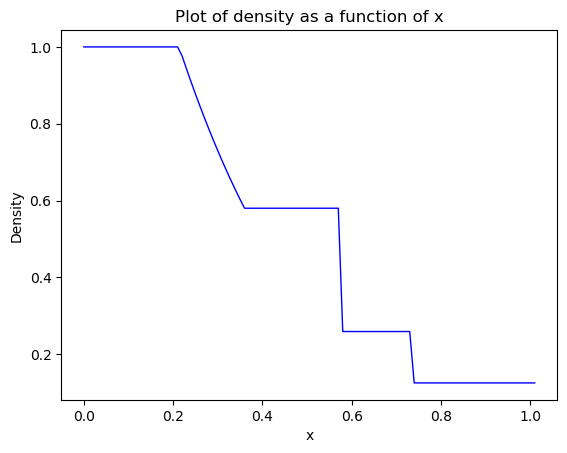

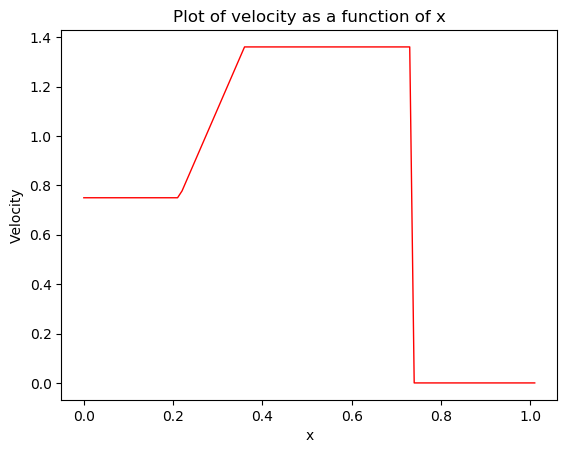

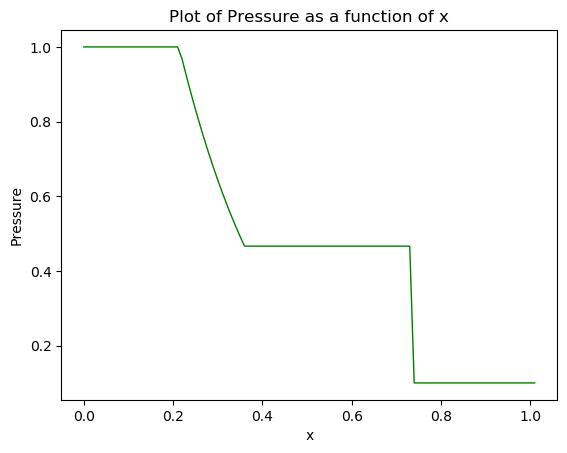

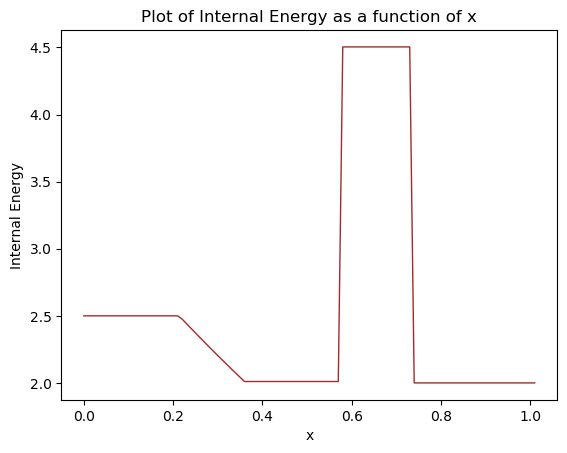

In [84]:
#Defining the grid and sampling the solutions at t=0.15
x_grid= 0:0.01:1.01
time_taken=0.2
x_0_taken=0.3
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid[it],v_grid[it],p_grid[it]= left_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken,x_0_taken,w_l,w_r) +right_shock(p_star_output, v_star_output, x_grid[it],time_taken,x_0_taken,w_l,w_r)
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)
using PyPlot


rho_exact=rho_grid
v_exact=v_grid
p_exact=p_grid
e_exact=e_grid

 plt.figure(1)    
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    plt.show()


 plt.figure(2)    
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    plt.show()


 plt.figure(3)    
    plt.plot(x_grid, p_exact, color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    plt.show()


 plt.figure(4)    
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    plt.show()

Above plots show the variation of density, pressure, velocity and internal energy as a function of x. The behavior of the plots look as expected. These trends are also observed as expected. Now lets check the Godunov scheme

In [44]:
#Functions to convert primitive variables to conservative variable(vice-versa too) and to flux vectors
#and a function to calculate the local sound speed at each grid cell 
function con2pri(w_con)
    w_pri=zeros(size(w_con))
    w_pri=[w_con[1],w_con[2]/w_con[1],(Gamma-1)*(w_con[3]-0.5*(w_con[2])^2/w_con[1])]
    return w_pri
end
function pri2con(w_pri)
    w_con=zeros(size(w_pri))
    w_con=[w_pri[1],w_pri[2]*w_pri[1],w_pri[3]/(Gamma-1)+0.5*w_pri[1]*w_pri[2]^2]
    return w_con
end
function flux(w_pri)
    flux=zeros(size(w_pri))
    flux=[w_pri[1]*w_pri[2],w_pri[1]*w_pri[2]^2+w_pri[3],w_pri[2]*(w_pri[3]/(Gamma-1)+0.5*(w_pri[1]*w_pri[2]^2)+w_pri[3])]
    return flux
end
function max_speed_func(w_inp)
    return abs(w_inp[2])+(Gamma*w_inp[3]/w_inp[1])^(0.5)
end

max_speed_func (generic function with 1 method)

In [49]:
#Riemann Solver_for_Godunov_scheme
function riemann_solver_for_Godunov(w_l_inp,w_r_inp)
    p_star_output=NR_p_star(p_star_guess,w_l_inp,w_r_inp)
    v_star_output=v_star(p_star_output,w_l_inp,w_r_inp)
    #println("The calculated p_star for Test 1 is ",p_star_output)
    #println("The calculated v_star for Test 1 is ",v_star_output)
    
    if v_star_output>0 && p_star_output>p_l
        return left_shock(p_star_output,v_star_output,0,0.1,0,w_l_inp,w_r_inp)
    elseif v_star_output>0 && p_star_output<=p_l
        return left_rarefaction_wave(p_star_output,v_star_output,0,0.1,0,w_l_inp,w_r_inp)
    elseif v_star_output<=0 && p_star_output>p_r
        return right_shock(p_star_output,v_star_output,0,0.1,0,w_l_inp,w_r_inp)
    elseif v_star_output<=0 && p_star_output<=p_r
        return right_rarefaction_wave(p_star_output,v_star_output,0,0.1,0,w_l_inp,w_r_inp)
    end
end


riemann_solver_for_Godunov (generic function with 1 method)

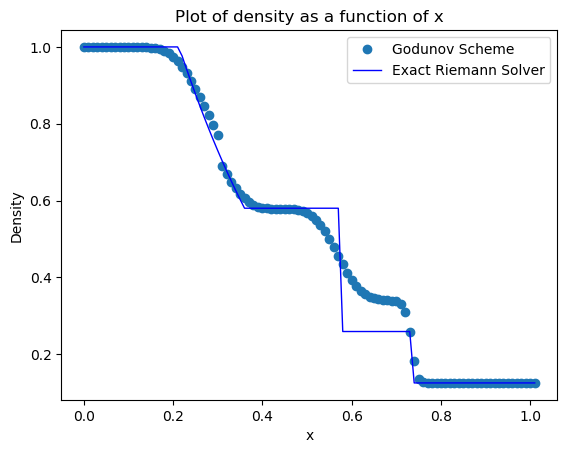

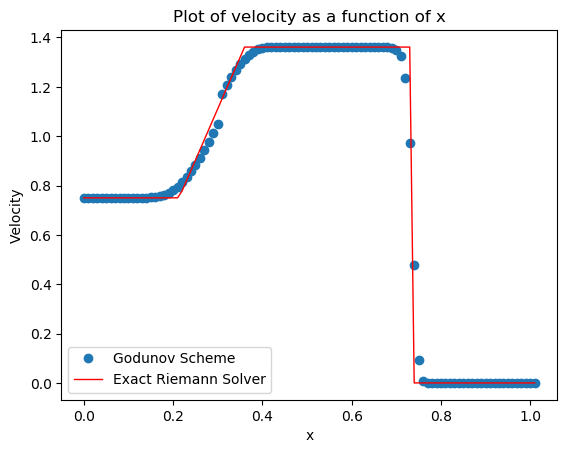

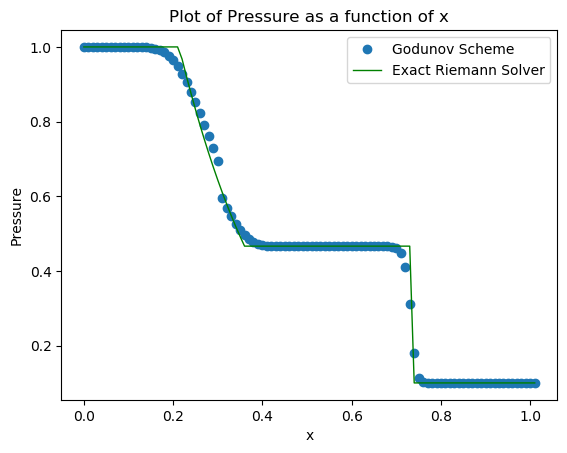

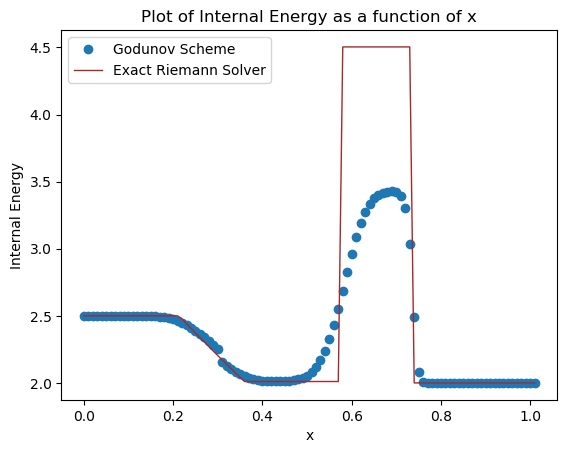

In [54]:
#Defining the initial grid and averaging of the godunov scheme
w_l_new=[1.0,0.75,1.0]
w_r_new=[0.125,0.0,0.1]
M_cells=100
dx=1/M_cells
x_grid= 0:dx:1.01 #x[1] and x[102] are ghost cells
time_taken=0.2
x_0_taken=0.3
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))
indices = findall(x->x==x_0_taken, x_grid)
grid_point_discontinuity = indices[1]

for it in 1:grid_point_discontinuity-1
    rho_grid[it],v_grid[it],p_grid[it]= w_l_new
end

rho_grid[grid_point_discontinuity],v_grid[grid_point_discontinuity],p_grid[grid_point_discontinuity]= (w_l+w_r)/2

for it in grid_point_discontinuity+1:M_cells+2
    rho_grid[it],v_grid[it],p_grid[it]= w_r_new
end
#Godunov_Scheme_for_Test_1
iterats=0
tim=0
#setting up initial conservative data
rho_grid_con=zeros(length(x_grid))
rhov_grid_con=zeros(length(x_grid))
E_grid_con=zeros(length(x_grid))
rho_grid_con_new=zeros(length(x_grid))
rhov_grid_con_new=zeros(length(x_grid))
E_grid_con_new=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=pri2con([rho_grid[it],v_grid[it],p_grid[it]])
end

while tim<time_taken && iterats<10000
    max_speed=0
    for it in 1:length(x_grid)
        max_speed=max(max_speed,max_speed_func([rho_grid[it],v_grid[it],p_grid[it]]))
    end
    dt=0.7*(dx/max_speed)
    for it in 2:length(x_grid)-1
            w_l_Godunov=riemann_solver_for_Godunov([rho_grid[it-1],v_grid[it-1],p_grid[it-1]],[rho_grid[it],v_grid[it],p_grid[it]])
            w_r_Godunov=riemann_solver_for_Godunov([rho_grid[it],v_grid[it],p_grid[it]],[rho_grid[it+1],v_grid[it+1],p_grid[it+1]])
        rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]=[rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]]- (dt/dx)*(flux(w_r_Godunov)-flux(w_l_Godunov))
    end
    for it in 2:length(x_grid)-1
        rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=[rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]]
    end
    for it in 2:length(x_grid)-1
        rho_grid[it],v_grid[it],p_grid[it]=con2pri([rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]])
    end
    
    #ghost_cells
    rho_grid_con[1],rhov_grid_con[1],E_grid_con[1]=[rho_grid_con[2],rhov_grid_con[2],E_grid_con[2]]
    rho_grid_con[length(x_grid)],rhov_grid_con[length(x_grid)],E_grid_con[length(x_grid)]=[rho_grid_con[length(x_grid)-1],rhov_grid_con[length(x_grid)-1],E_grid_con[length(x_grid)-1]]
    rho_grid[1],v_grid[1],p_grid[1]=[rho_grid[2],v_grid[2],p_grid[2]]
    rho_grid[length(x_grid)],v_grid[length(x_grid)],p_grid[length(x_grid)]=[rho_grid[length(x_grid)-1],v_grid[length(x_grid)-1],p_grid[length(x_grid)-1]]
    
    iterats=iterats+1
    tim=tim+dt
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)

plt.figure(5)    
    plt.plot(x_grid, rho_grid, "o")
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(6)    
    plt.plot(x_grid, v_grid, "o")
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(7)    
    plt.plot(x_grid, p_grid, "o")
    plt.plot(x_grid, p_exact,color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(8)    
    plt.plot(x_grid, e_grid,"o")
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()

Lax Friedrich's Treatment of Test 1

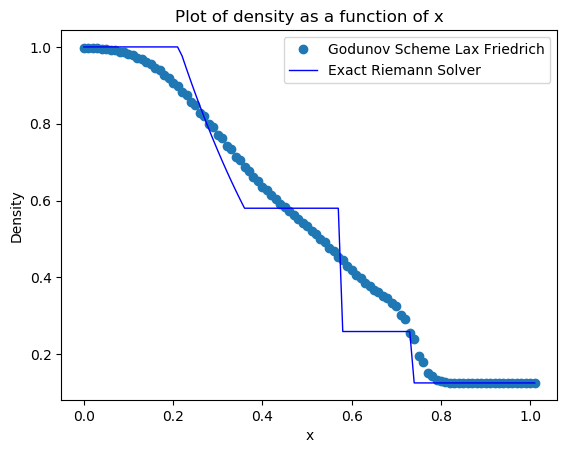

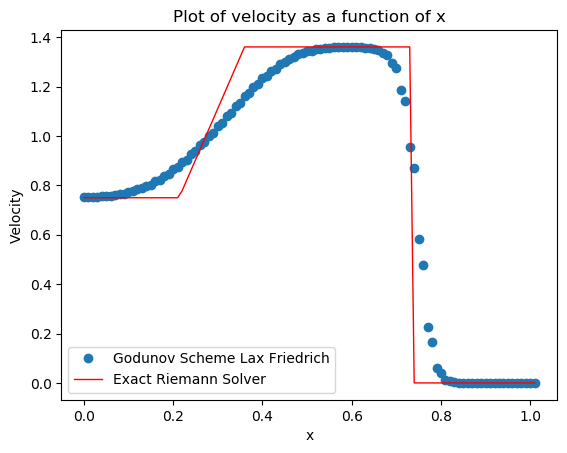

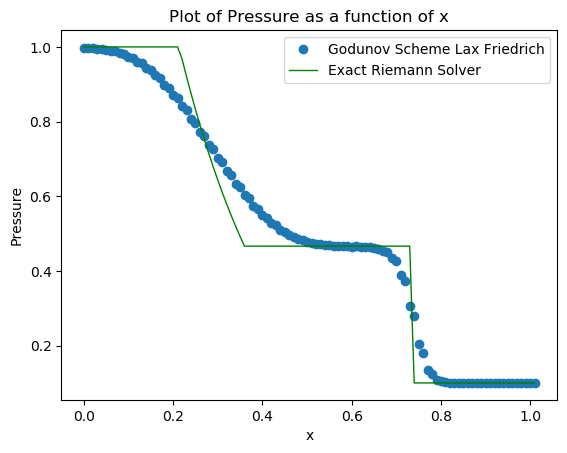

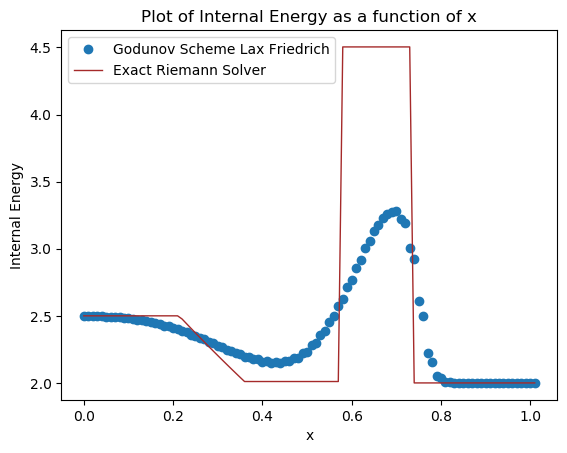

In [86]:
#Defining the initial grid and averaging of the godunov scheme
w_l_new=[1.0,0.75,1.0]
w_r_new=[0.125,0.0,0.1]
M_cells=100
dx=1/M_cells
x_grid= 0:dx:1.01 #x[1] and x[102] are ghost cells
time_taken=0.2
x_0_taken=0.3
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))
indices = findall(x->x==x_0_taken, x_grid)
grid_point_discontinuity = indices[1]

for it in 1:grid_point_discontinuity-1
    rho_grid[it],v_grid[it],p_grid[it]= w_l_new
end

rho_grid[grid_point_discontinuity],v_grid[grid_point_discontinuity],p_grid[grid_point_discontinuity]= (w_l+w_r)/2

for it in grid_point_discontinuity+1:M_cells+2
    rho_grid[it],v_grid[it],p_grid[it]= w_r_new
end
#Godunov_Scheme_for_Test_1
iterats=0
tim=0
#setting up initial conservative data
rho_grid_con=zeros(length(x_grid))
rhov_grid_con=zeros(length(x_grid))
E_grid_con=zeros(length(x_grid))
rho_grid_con_new=zeros(length(x_grid))
rhov_grid_con_new=zeros(length(x_grid))
E_grid_con_new=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=pri2con([rho_grid[it],v_grid[it],p_grid[it]])
end

while tim<time_taken && iterats<10000
    max_speed=0
    for it in 1:length(x_grid)
        max_speed=max(max_speed,max_speed_func([rho_grid[it],v_grid[it],p_grid[it]]))
    end
    dt=0.7*(dx/max_speed)
    for it in 2:length(x_grid)-1
            #w_l_Godunov=riemann_solver_for_Godunov([rho_grid[it-1],v_grid[it-1],p_grid[it-1]],[rho_grid[it],v_grid[it],p_grid[it]])
            #w_r_Godunov=riemann_solver_for_Godunov([rho_grid[it],v_grid[it],p_grid[it]],[rho_grid[it+1],v_grid[it+1],p_grid[it+1]])
        rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]=0.5*([rho_grid_con[it-1],rhov_grid_con[it-1],E_grid_con[it-1]]+[rho_grid_con[it+1],rhov_grid_con[it+1],E_grid_con[it+1]])- (dt/(2*dx))*(flux([rho_grid[it+1],v_grid[it+1],p_grid[it+1]])-flux([rho_grid[it-1],v_grid[it-1],p_grid[it-1]]))
    end
    for it in 2:length(x_grid)-1
        rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=[rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]]
    end
    for it in 2:length(x_grid)-1
        rho_grid[it],v_grid[it],p_grid[it]=con2pri([rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]])
    end
    
    #ghost_cells
    rho_grid_con[1],rhov_grid_con[1],E_grid_con[1]=[rho_grid_con[2],rhov_grid_con[2],E_grid_con[2]]
    rho_grid_con[length(x_grid)],rhov_grid_con[length(x_grid)],E_grid_con[length(x_grid)]=[rho_grid_con[length(x_grid)-1],rhov_grid_con[length(x_grid)-1],E_grid_con[length(x_grid)-1]]
    rho_grid[1],v_grid[1],p_grid[1]=[rho_grid[2],v_grid[2],p_grid[2]]
    rho_grid[length(x_grid)],v_grid[length(x_grid)],p_grid[length(x_grid)]=[rho_grid[length(x_grid)-1],v_grid[length(x_grid)-1],p_grid[length(x_grid)-1]]
    
    iterats=iterats+1
    tim=tim+dt
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)

plt.figure(21)    
    plt.plot(x_grid, rho_grid, "o")
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(22)    
    plt.plot(x_grid, v_grid, "o")
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(23)    
    plt.plot(x_grid, p_grid, "o")
    plt.plot(x_grid, p_exact,color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(24)    
    plt.plot(x_grid, e_grid,"o")
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()

Ans 1b) Following the algorithm discussed in the class, first we will find the primitive variables($v_*, p_*$) solutions around the contact discontinuity for Test 2. For that we need to apply the Newton Raphson scheme.

In [87]:
#calculating p_star and v_star
w_l=[1.0,-2.0,0.4]
w_r=[1.0,2.0,0.4]
rho_l,v_l,p_l,rho_r,v_r,p_r,c_l,c_r,A_l,B_l,A_r,B_r=state_variables(w_l,w_r)
p_star_guess= 0.5*(p_l+p_r)
println("The p_star guess for Test 1 is ",p_star_guess)
p_star_output=NR_p_star(p_star_guess,w_l,w_r)
v_star_output=v_star(p_star_output,w_l,w_r)
println("The calculated p_star for Test 1 is ",p_star_output)
println("The calculated v_star for Test 1 is ",v_star_output)

The p_star guess for Test 1 is 0.4
The calculated p_star for Test 1 is 0.0018957953754854106
The calculated v_star for Test 1 is 0.0


Since $p_*$=0.00189<$p_l=0.4$ and $p_*=0.00189$<$p_l=0.4$ we have two refraction wave solution

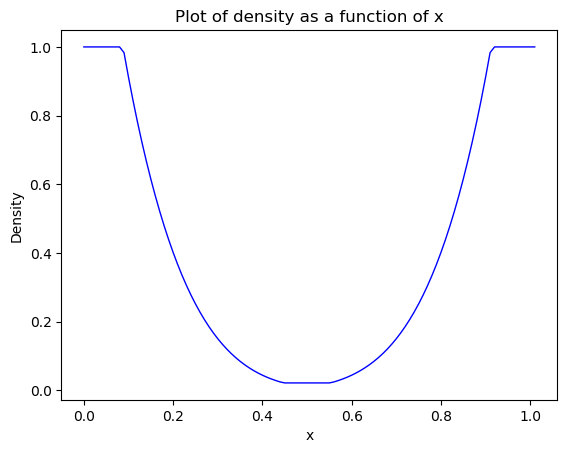

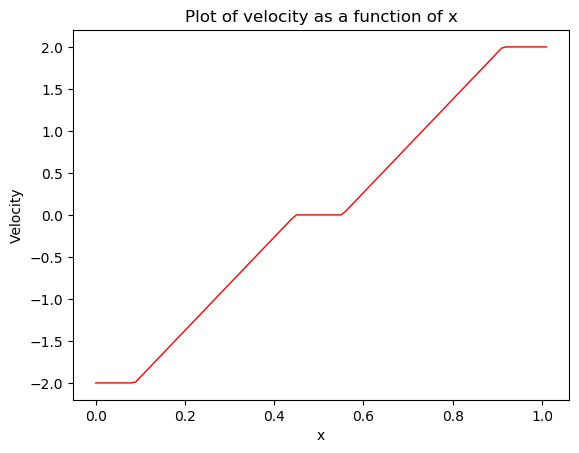

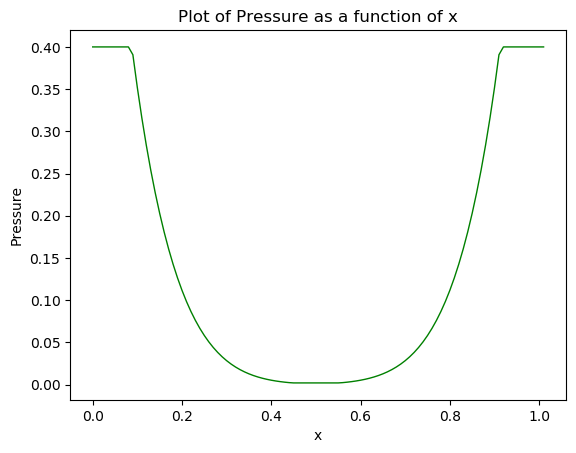

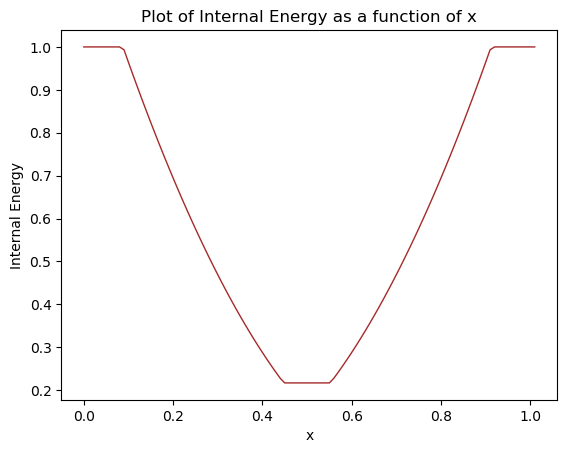

In [88]:
#Defining the grid and sampling the solutions at t=0.15
x_grid= 0:0.01:1.01
time_taken=0.15
x_0_taken=0.5
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))
indices = findall(x->x==x_0_taken, x_grid)
grid_point_discontinuity = indices[1]

for it in 1:length(x_grid)
    rho_grid[it],v_grid[it],p_grid[it]= left_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken,x_0_taken,w_l,w_r) +right_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken,x_0_taken,w_l,w_r)
end
rho_grid[grid_point_discontinuity]=rho_grid[grid_point_discontinuity]/2
v_grid[grid_point_discontinuity]=v_grid[grid_point_discontinuity]/2
p_grid[grid_point_discontinuity]=p_grid[grid_point_discontinuity]/2
@. e_grid= p_grid/((Gamma-1)*rho_grid)
using PyPlot


rho_exact=rho_grid
v_exact=v_grid
p_exact=p_grid
e_exact=e_grid

 plt.figure(9)    
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    plt.show()


 plt.figure(10)    
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    plt.show()


 plt.figure(11)    
    plt.plot(x_grid, p_exact, color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    plt.show()


 plt.figure(12)    
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    plt.show()


Above plots show the variation of density, pressure, velocity and internal energy as a function of x for Test 2. The behavior of the plots look as expected. Now we look at Godunov scheme implementation

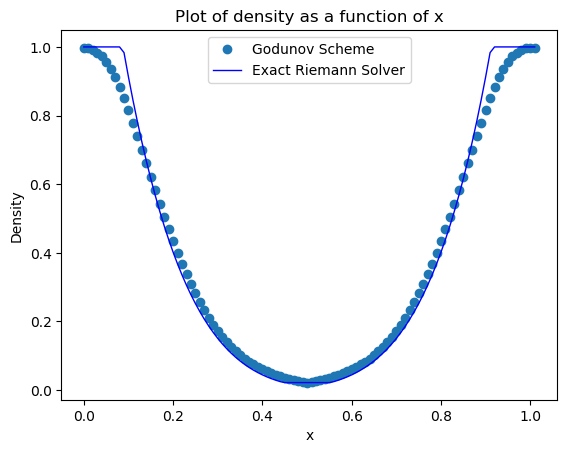

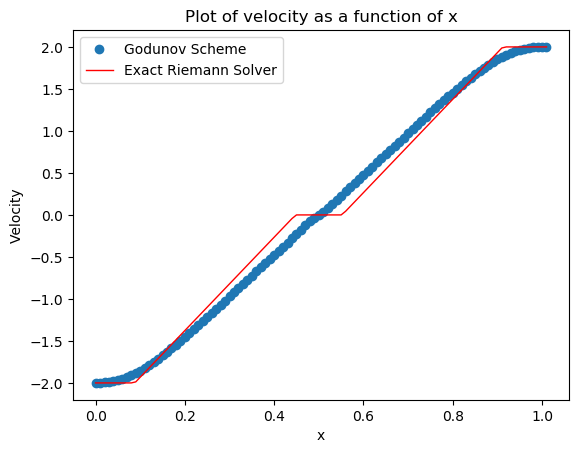

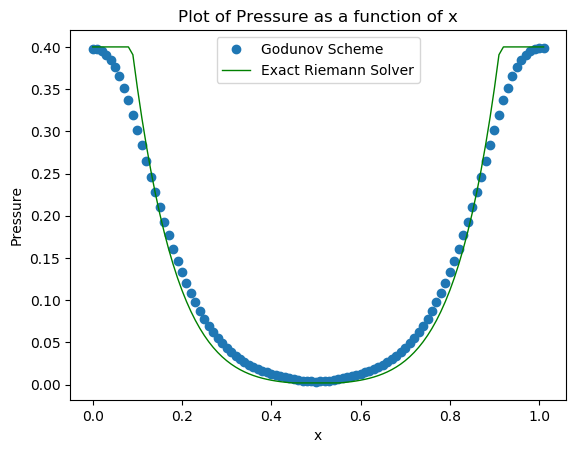

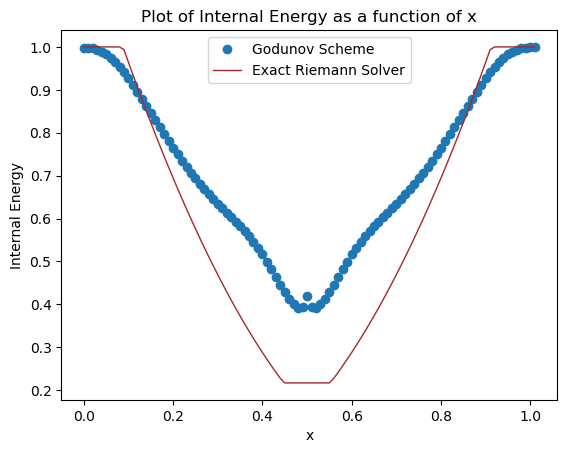

In [90]:
#Defining the initial grid and averaging of the godunov scheme
w_l_new=[1.0,-2.0,0.4]
w_r_new=[1.0,2.0,0.4]
M_cells=100
dx=1/M_cells
x_grid= 0:dx:1.01 #x[1] and x[102] are ghost cells
time_taken=0.15
x_0_taken=0.5
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))
indices = findall(x->x==x_0_taken, x_grid)
grid_point_discontinuity = indices[1]

for it in 1:grid_point_discontinuity-1
    rho_grid[it],v_grid[it],p_grid[it]= w_l_new
end

rho_grid[grid_point_discontinuity],v_grid[grid_point_discontinuity],p_grid[grid_point_discontinuity]= (w_l+w_r)/2

for it in grid_point_discontinuity+1:M_cells+2
    rho_grid[it],v_grid[it],p_grid[it]= w_r_new
end
#Godunov_Scheme_for_Test_1
iterats=0
tim=0
#setting up initial conservative data
rho_grid_con=zeros(length(x_grid))
rhov_grid_con=zeros(length(x_grid))
E_grid_con=zeros(length(x_grid))
rho_grid_con_new=zeros(length(x_grid))
rhov_grid_con_new=zeros(length(x_grid))
E_grid_con_new=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=pri2con([rho_grid[it],v_grid[it],p_grid[it]])
end

while tim<time_taken && iterats<10000
    max_speed=0
    for it in 1:length(x_grid)
        max_speed=max(max_speed,max_speed_func([rho_grid[it],v_grid[it],p_grid[it]]))
    end
    dt=0.7*(dx/max_speed)
    for it in 2:length(x_grid)-1
            w_l_Godunov=riemann_solver_for_Godunov([rho_grid[it-1],v_grid[it-1],p_grid[it-1]],[rho_grid[it],v_grid[it],p_grid[it]])
            w_r_Godunov=riemann_solver_for_Godunov([rho_grid[it],v_grid[it],p_grid[it]],[rho_grid[it+1],v_grid[it+1],p_grid[it+1]])
        rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]=[rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]]- (dt/dx)*(flux(w_r_Godunov)-flux(w_l_Godunov))
    end
    for it in 2:length(x_grid)-1
        rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=[rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]]
    end
    for it in 2:length(x_grid)-1
        rho_grid[it],v_grid[it],p_grid[it]=con2pri([rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]])
    end
    
    #ghost_cells
    rho_grid_con[1],rhov_grid_con[1],E_grid_con[1]=[rho_grid_con[2],rhov_grid_con[2],E_grid_con[2]]
    rho_grid_con[length(x_grid)],rhov_grid_con[length(x_grid)],E_grid_con[length(x_grid)]=[rho_grid_con[length(x_grid)-1],rhov_grid_con[length(x_grid)-1],E_grid_con[length(x_grid)-1]]
    rho_grid[1],v_grid[1],p_grid[1]=[rho_grid[2],v_grid[2],p_grid[2]]
    rho_grid[length(x_grid)],v_grid[length(x_grid)],p_grid[length(x_grid)]=[rho_grid[length(x_grid)-1],v_grid[length(x_grid)-1],p_grid[length(x_grid)-1]]
    
    iterats=iterats+1
    tim=tim+dt
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)

plt.figure(13)    
    plt.plot(x_grid, rho_grid, "o")
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(14)    
    plt.plot(x_grid, v_grid, "o")
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(15)    
    plt.plot(x_grid, p_grid, "o")
    plt.plot(x_grid, p_exact,color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()


 plt.figure(16)    
    plt.plot(x_grid, e_grid,"o")
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    legend(["Godunov Scheme","Exact Riemann Solver"])
    plt.show()

Lax Friedrich's treatment of Test2

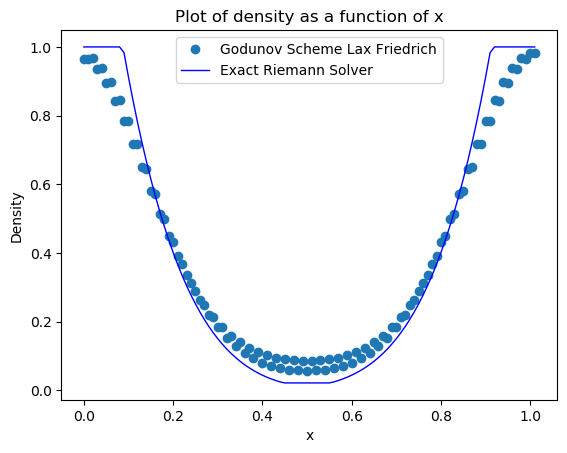

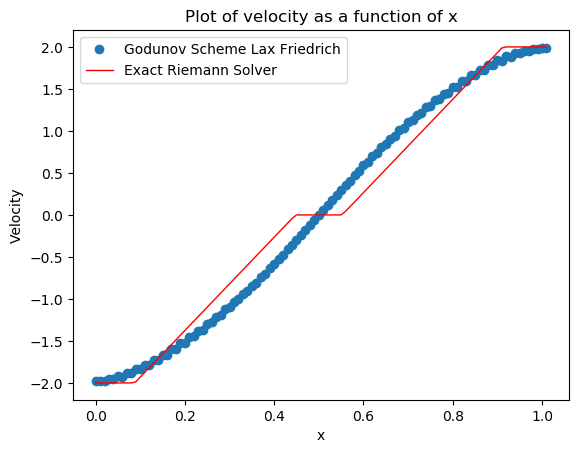

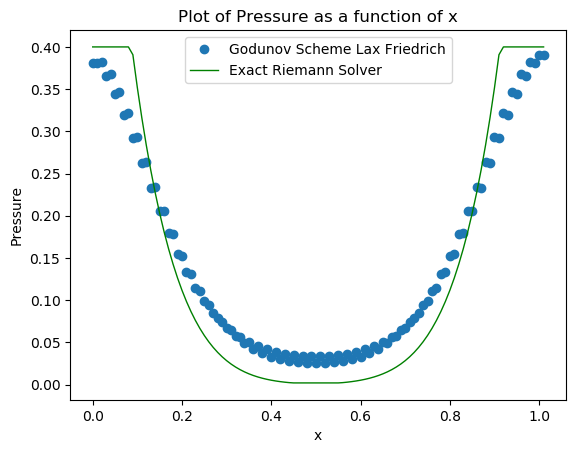

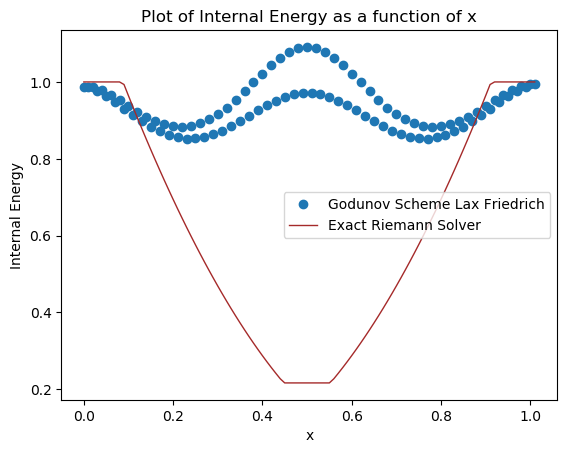

In [89]:
#Defining the initial grid and averaging of the godunov scheme
w_l_new=[1.0,-2.0,0.4]
w_r_new=[1.0,2.0,0.4]
M_cells=100
dx=1/M_cells
x_grid= 0:dx:1.01 #x[1] and x[102] are ghost cells
time_taken=0.15
x_0_taken=0.5
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))
indices = findall(x->x==x_0_taken, x_grid)
grid_point_discontinuity = indices[1]

for it in 1:grid_point_discontinuity-1
    rho_grid[it],v_grid[it],p_grid[it]= w_l_new
end

rho_grid[grid_point_discontinuity],v_grid[grid_point_discontinuity],p_grid[grid_point_discontinuity]= (w_l+w_r)/2

for it in grid_point_discontinuity+1:M_cells+2
    rho_grid[it],v_grid[it],p_grid[it]= w_r_new
end
#Godunov_Scheme_for_Test_1
iterats=0
tim=0
#setting up initial conservative data
rho_grid_con=zeros(length(x_grid))
rhov_grid_con=zeros(length(x_grid))
E_grid_con=zeros(length(x_grid))
rho_grid_con_new=zeros(length(x_grid))
rhov_grid_con_new=zeros(length(x_grid))
E_grid_con_new=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=pri2con([rho_grid[it],v_grid[it],p_grid[it]])
end

while tim<time_taken && iterats<10000
    max_speed=0
    for it in 1:length(x_grid)
        max_speed=max(max_speed,max_speed_func([rho_grid[it],v_grid[it],p_grid[it]]))
    end
    dt=0.7*(dx/max_speed)
    for it in 2:length(x_grid)-1
            #w_l_Godunov=riemann_solver_for_Godunov([rho_grid[it-1],v_grid[it-1],p_grid[it-1]],[rho_grid[it],v_grid[it],p_grid[it]])
            #w_r_Godunov=riemann_solver_for_Godunov([rho_grid[it],v_grid[it],p_grid[it]],[rho_grid[it+1],v_grid[it+1],p_grid[it+1]])
        rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]=0.5*([rho_grid_con[it-1],rhov_grid_con[it-1],E_grid_con[it-1]]+[rho_grid_con[it+1],rhov_grid_con[it+1],E_grid_con[it+1]])- (dt/(2*dx))*(flux([rho_grid[it+1],v_grid[it+1],p_grid[it+1]])-flux([rho_grid[it-1],v_grid[it-1],p_grid[it-1]]))
    end
    for it in 2:length(x_grid)-1
        rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]=[rho_grid_con_new[it],rhov_grid_con_new[it],E_grid_con_new[it]]
    end
    for it in 2:length(x_grid)-1
        rho_grid[it],v_grid[it],p_grid[it]=con2pri([rho_grid_con[it],rhov_grid_con[it],E_grid_con[it]])
    end
    
    #ghost_cells
    rho_grid_con[1],rhov_grid_con[1],E_grid_con[1]=[rho_grid_con[2],rhov_grid_con[2],E_grid_con[2]]
    rho_grid_con[length(x_grid)],rhov_grid_con[length(x_grid)],E_grid_con[length(x_grid)]=[rho_grid_con[length(x_grid)-1],rhov_grid_con[length(x_grid)-1],E_grid_con[length(x_grid)-1]]
    rho_grid[1],v_grid[1],p_grid[1]=[rho_grid[2],v_grid[2],p_grid[2]]
    rho_grid[length(x_grid)],v_grid[length(x_grid)],p_grid[length(x_grid)]=[rho_grid[length(x_grid)-1],v_grid[length(x_grid)-1],p_grid[length(x_grid)-1]]
    
    iterats=iterats+1
    tim=tim+dt
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)

plt.figure(17)    
    plt.plot(x_grid, rho_grid, "o")
    plt.plot(x_grid, rho_exact, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(18)    
    plt.plot(x_grid, v_grid, "o")
    plt.plot(x_grid, v_exact, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(19)    
    plt.plot(x_grid, p_grid, "o")
    plt.plot(x_grid, p_exact,color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()


 plt.figure(20)    
    plt.plot(x_grid, e_grid,"o")
    plt.plot(x_grid, e_exact, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    legend(["Godunov Scheme Lax Friedrich","Exact Riemann Solver"])
    plt.show()

Ans 1a) All the required profiles have been plotted above. The internal energy profile plotted as calculated from Godunov scheme for Test2 shows large deviation from the exactly solved profile. Internal energy is dependent on two simulated profiles i.e. density and pressure and the errors in both the files are accumulated and become pronounced in the internal energy profile. Since Godunove scheme relies on many approximations like $C_{CFL}$ and flux functions, some errors are there in density and pressure profile which are pronounced in the internal energy profile  

Ans 1b)The first method does recover correct non-linear speed but the Lax -Friedrich's method does not. Since the first analysis is conservative scheme it converges to the weak solution due to Lax-Wenderoff theorem. However the Lax-Frierich's scheme is non conservative and does not catch the correct non linear speeds of the equations.

This work was done by Aman Agarwal follwing 

1)The notes by Dr. Daniel Siegel on [this site](https://github.com/dmsiegel/computational-fluid-dynamics-course/blob/master/lecture_notes/Chapter_5.pdf)<\br>

2)Godunov method for the Euler Equations<\br>
van Halder, Y. (Author). 2014<\br>
https://research.tue.nl/en/studentTheses/godunov-method-for-the-euler-equations<\br>

3)Chapter 4 and chapter 12 of -<\br>
"Book,*'Riemann Solvers and Numerical Methods for Fluid Dynamics: A Practical Introduction',* Toro,E.F.,https://books.google.co.in/books?id=6QFAAQAAIAAJ, 1997,Springer"</br>

